In [1]:
# Make the following code support python2 and python3
from __future__ import division, print_function, unicode_literals

# Check if the version of python is 3.5 and above
import sys
assert sys.version_info >= (3, 5)

# Check to see if sklearn is version 0.20 and above
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os 

# The result obtained after each run is the same as that of this notebook
np.random.seed(42) 

# Make matplotlib diagrams work better
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Setting the route to save the image
PROJECT_ROOT_DIR = "."
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGE_PATH, exist_ok=True)

# Setting the route to save the model
MODEL_PATH  = os.path.join(PROJECT_ROOT_DIR, "models")
os.makedirs(MODEL_PATH, exist_ok=True)

# Setting the route to read the data set
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "dataset")

def save_fig(fig_id, tight_layout=True):
    '''
    Run to save automatic pictures
    
    :param fig_id: image name
    '''
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# suppress the warning caused by sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import joblib

def score(model, model_name, pkl_name, X_train, X_test, y_train, y_test):
    """gain the R2 and RMSE score of the model
    
    :param model: ML model from sklearn package
    :param model_name: string, the name input
    :param X_train: data set used for training
    :param X_test: data set used for predicting
    :param y_train: the labels of training data set
    :param y_test: the labels of testing data set
    """
    global MODEL_PATH, PROJECT_ROOT_DIR
    
    model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    train_rmse = np.around(np.sqrt(mean_squared_error(y_train, y_train_predict)), decimals=3)
    test_rmse = np.around(np.sqrt(mean_squared_error(y_test, y_test_predict)), decimals=3)
    train_r2 = np.around(r2_score(y_train, y_train_predict), decimals=3)
    test_r2 = np.around(r2_score(y_test, y_test_predict), decimals=3)
    print('-'*10 + model_name + '-'*10)
    print("The RMSE on training set is {}".format(train_rmse))
    print("The RMSE on test set is {}".format(test_rmse))
    print("R2 score on training set is {}".format(train_r2))
    print("R2 score on test set is {}".format(test_r2))
    
    # store the trained model in a specific directory "models"
    path = os.path.join(PROJECT_ROOT_DIR, "models", pkl_name + ".pkl")
    joblib.dump(model, path)
    print("Successfully store the trained model in {}.pkl".format(pkl_name))
    return y_train_predict, y_test_predict, train_rmse, test_rmse, train_r2, test_r2                     
            

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def binary_plot(y_train,  y_train_label, y_test, y_test_label,
                train_rmse, test_rmse, train_r2, test_r2,
                text_position=[0.5, -0.075]):
    """plot the binary diagram
    
    :param y_train: the label of the training data set
    :param y_train_label: the prediction of the training the data set
    :param y_test: the label of the testing data set
    :param y_test_label: the prediction of the testing data set
    :param train_rmse: the RMSE score of the training data set
    :param test_rmse: the RMSE score of the testing data set
    :param train_r2: the R2 score of the training data set
    :param test_r2: the R2 score of the testing data set
    :param test_position: the coordinates of R2 text for
    """
    
    plt.figure(figsize=(6,6))
    plt.scatter(y_train, y_train_label, marker="s",
                label="Training set-RMSE={}".format(train_rmse))
    plt.scatter(y_test, y_test_label, marker="o",
                label="Test set-RMSE={}".format(test_rmse))
    plt.legend(loc="upper left", fontsize=14)
    plt.xlabel("Reference value", fontsize=20)
    plt.ylabel("Predicted value", fontsize=20)
    a=[0,1]; b=[0,1]
    plt.plot(a, b)
    plt.text(text_position[0], text_position[1]+0.075,
             r'$R^2(train)=${}'.format(train_r2),
             fontdict={'size': 16, 'color': '#000000'})
    plt.text(text_position[0], text_position[1]-0.075,
             r'$R^2(test)=${}'.format(test_r2),
             fontdict={'size': 16, 'color': '#000000'})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim((-0.2, 1.2))

# Pattern I

In [4]:
# read the excel of the data for Pattern I
data1 = os.path.join(DATA_PATH, "pattern1_data.xlsx")
df1 = pd.read_excel(data1, engine="openpyxl")
df1_edit = df1
df1_edit

,Si,Ti,Al,Cr,Fe,Mn,Mg,Ca,Na,Fe3+/Fetot(Correction),clustering_label
0,1.880934,1.503907e-02,0.287436,2.155232e-02,0.077207,2.770668e-03,8.013733e-01,7.909335e-01,0.141648,0.245730,4
1,1.892376,1.552773e-02,0.284656,2.032665e-02,0.078130,2.453617e-03,7.735488e-01,8.108699e-01,0.119354,0.260358,4
2,1.904724,1.399460e-02,0.268677,2.537741e-02,0.068329,1.544699e-03,7.884364e-01,7.933376e-01,0.137905,0.236632,4
3,1.897332,1.383958e-02,0.260175,2.195926e-02,0.095928,2.749659e-03,8.221831e-01,7.775931e-01,0.109102,0.181867,4
4,1.889801,1.501711e-02,0.273757,1.951223e-02,0.098037,2.459220e-03,8.213037e-01,7.695577e-01,0.114701,0.147499,4
...,...,...,...,...,...,...,...,...,...,...,...
402,1.970000,1.000000e-07,0.050000,1.000000e-07,0.370000,3.000000e-02,6.200000e-01,8.300000e-01,0.150000,0.126594,4
403,1.970000,1.000000e-07,0.040000,1.000000e-07,0.240000,1.000000e-02,7.700000e-01,8.300000e-01,0.170000,0.144002,4
404,1.970000,1.000000e-07,0.020000,1.000000e-07,0.520000,1.000000e-02,5.000000e-01,6.900000e-01,0.280000,0.247875,2
405,1.960000,1.000000e-07,0.040000,1.000000e-07,0.510000,2.000000e-02,5.400000e-01,7.600000e-01,0.180000,0.156849,3


### 1.1 Polynomial Regression 

In [55]:
from sklearn.decomposition import PCA

# get feature data set and label data set
X_all_11 = df1_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
y_all_11 = df1_edit["Fe3+/Fetot(Correction)"].copy()

# do dimension reduction on the training feature data set 
pca_11 = PCA(n_components=7)
# the original dimensions 9 will be transformed into 7
X_all_reduced_11 = pca_11.fit_transform(X_all_11)
X_all_reduced_11.shape

(407, 7)

In [56]:
pd.DataFrame(X_all_reduced_11)

,0,1,2,3,4,5,6
0,-0.224186,-0.059362,-0.045899,0.002015,-0.002805,0.029960,-0.011655
1,-0.228414,-0.042009,-0.066054,0.027429,-0.014985,0.014420,-0.005693
2,-0.220721,-0.054856,-0.032513,0.022611,-0.020257,0.014592,-0.008002
3,-0.238198,-0.028624,-0.017661,-0.006978,0.008551,0.002193,-0.001353
4,-0.231234,-0.037542,-0.026451,-0.016717,0.014662,0.005555,-0.000604
...,...,...,...,...,...,...,...
402,-0.005506,0.291997,0.004081,0.090747,-0.050833,-0.011470,-0.020370
403,-0.130616,0.187522,0.103045,0.048558,-0.073566,0.025922,-0.033359
404,0.257610,0.333657,0.023694,0.055148,-0.015491,-0.002115,-0.012429
405,0.142774,0.369152,-0.017125,0.065545,-0.000330,-0.025487,-0.011457


In [57]:
from sklearn.preprocessing import PolynomialFeatures

# based on the reduction data, do dimension augmentation with the degree of the polynomial features 3
poly_features_11 = PolynomialFeatures(degree=3, include_bias=False)
X_all_augmented_11 = poly_features_11.fit_transform(X_all_reduced_11)
X_all_augmented_11.shape

(407, 119)

In [58]:
# the columns name of the augmented data set
columns_name_11 = poly_features_11.get_feature_names()

# the augmentd data set, x0 refers to the first columns in the reduced data set
X_all_augmented_11 = pd.DataFrame(X_all_augmented_11)
X_all_augmented_11.columns = columns_name_11
X_all_augmented_11

,x0,x1,x2,x3,x4,x5,x6,x0^2,x0 x1,x0 x2,...,x4^3,x4^2 x5,x4^2 x6,x4 x5^2,x4 x5 x6,x4 x6^2,x5^3,x5^2 x6,x5 x6^2,x6^3
0,-0.224186,-0.059362,-0.045899,0.002015,-0.002805,0.029960,-0.011655,0.050259,0.013308,0.010290,...,-2.206433e-08,2.356855e-07,-9.168335e-08,-2.517532e-06,9.793381e-07,-3.809696e-07,2.689163e-05,-1.046104e-05,4.069420e-06,-1.583034e-06
1,-0.228414,-0.042009,-0.066054,0.027429,-0.014985,0.014420,-0.005693,0.052173,0.009595,0.015088,...,-3.364870e-06,3.237936e-06,-1.278261e-06,-3.115791e-06,1.230041e-06,-4.855915e-07,2.998253e-06,-1.183640e-06,4.672734e-07,-1.844686e-07
2,-0.220721,-0.054856,-0.032513,0.022611,-0.020257,0.014592,-0.008002,0.048718,0.012108,0.007176,...,-8.311811e-06,5.987521e-06,-3.283351e-06,-4.313188e-06,2.365204e-06,-1.296997e-06,3.107061e-06,-1.703805e-06,9.343083e-07,-5.123426e-07
3,-0.238198,-0.028624,-0.017661,-0.006978,0.008551,0.002193,-0.001353,0.056738,0.006818,0.004207,...,6.252945e-07,1.603333e-07,-9.895893e-08,4.111147e-08,-2.537431e-08,1.566121e-08,1.054150e-08,-6.506290e-09,4.015731e-09,-2.478539e-09
4,-0.231234,-0.037542,-0.026451,-0.016717,0.014662,0.005555,-0.000604,0.053469,0.008681,0.006116,...,3.152078e-06,1.194183e-06,-1.297684e-07,4.524230e-07,-4.916352e-08,5.342459e-09,1.714031e-07,-1.862588e-08,2.024021e-09,-2.199446e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,-0.005506,0.291997,0.004081,0.090747,-0.050833,-0.011470,-0.020370,0.000030,-0.001608,-0.000022,...,-1.313544e-04,-2.963858e-05,-5.263592e-05,-6.687598e-06,-1.187668e-05,-2.109210e-05,-1.508978e-06,-2.679833e-06,-4.759185e-06,-8.451959e-06
403,-0.130616,0.187522,0.103045,0.048558,-0.073566,0.025922,-0.033359,0.017061,-0.024493,-0.013459,...,-3.981285e-04,1.402850e-04,-1.805342e-04,-4.943099e-05,6.361325e-05,-8.186455e-05,1.741756e-05,-2.241484e-05,2.884589e-05,-3.712207e-05
404,0.257610,0.333657,0.023694,0.055148,-0.015491,-0.002115,-0.012429,0.066363,0.085953,0.006104,...,-3.717051e-06,-5.074833e-07,-2.982305e-06,-6.928593e-08,-4.071695e-07,-2.392795e-06,-9.459503e-09,-5.559024e-08,-3.266847e-07,-1.919814e-06
405,0.142774,0.369152,-0.017125,0.065545,-0.000330,-0.025487,-0.011457,0.020384,0.052705,-0.002445,...,-3.593426e-11,-2.775379e-09,-1.247565e-09,-2.143562e-07,-9.635553e-08,-4.331291e-08,-1.655578e-05,-7.442010e-06,-3.345268e-06,-1.503736e-06


In [59]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_11 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)
# divide augmented X and y into training and testing data
for train_index, test_index in split_11.split(df1_edit, df1_edit["clustering_label"]):
    # train : test = 4 : 1
    X_train_11 = X_all_augmented_11.loc[train_index]
    X_test_11 = X_all_augmented_11.loc[test_index] 
    y_train_11 = y_all_11.loc[train_index]
    y_test_11 = y_all_11.loc[test_index]

----------polynomial regression----------
The RMSE on training set is 0.074
The RMSE on test set is 0.085
R2 score on training set is 0.891
R2 score on test set is 0.856
Successfully store the trained model in poly.pkl
Saving figure poly_reg_pattern1


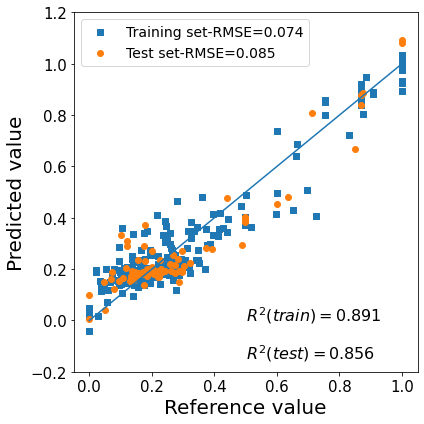

In [60]:
from sklearn.linear_model import ElasticNet

# Based on regularized linear regression, bulid the polynomial regression with the augmented X 
polyreg_11 = ElasticNet(alpha=0.0001, l1_ratio=0.0001, max_iter=100000, tol=0.0005)
# train the model and get the corresponding score
y_train_predict_11, y_test_predict_11, train_rmse_11, test_rmse_11, train_r2_11, test_r2_11 = \
score(polyreg_11, 'polynomial regression', 'poly',X_train_11, X_test_11, y_train_11, y_test_11)
# plot binary diagram
binary_plot(y_train = y_train_11,
            y_train_label = y_train_predict_11,
            y_test = y_test_11,
            y_test_label = y_test_predict_11,
            train_rmse = train_rmse_11,
            test_rmse = test_rmse_11,
            train_r2 = train_r2_11,
            test_r2 = test_r2_11)
save_fig("poly_reg_pattern1")

### 1.2 Artificial Neural Network

In [5]:
# get feature data set and label data set
X_all_12=df1_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
y_all_12 =df1_edit["Fe3+/Fetot(Correction)"].copy()

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_12 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)
# divide augmented X and y into training and testing data
for train_index, test_index in split_12.split(df1_edit, df1_edit["clustering_label"]):
    # train : test = 4 : 1
    X_train_12 = X_all_12.loc[train_index]
    X_test_12 = X_all_12.loc[test_index] 
    y_train_12 = y_all_12.loc[train_index]
    y_test_12 = y_all_12.loc[test_index]

----------Artificial Neural Network----------
The RMSE on training set is 0.084
The RMSE on test set is 0.091
R2 score on training set is 0.859
R2 score on test set is 0.837
Successfully store the trained model in mlp.pkl
Saving figure ann_pattern1


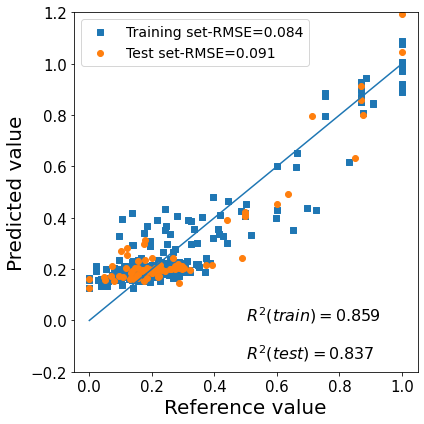

In [7]:
from sklearn.neural_network import MLPRegressor

# build up Artificial Neural Network model
mlp_12 = MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', early_stopping=False,
                   hidden_layer_sizes=(20, 120, 20), max_iter=2000, solver='adam', tol=1e-05,
                   random_state=45)

# train the model and get the corresponding score
y_train_predict_12, y_test_predict_12, train_rmse_12, test_rmse_12, train_r2_12, test_r2_12 = \
score(mlp_12, 'Artificial Neural Network', 'mlp', X_train_12, X_test_12, y_train_12, y_test_12)

# plot binary diagram
binary_plot(y_train = y_train_12,
            y_train_label = y_train_predict_12,
            y_test = y_test_12,
            y_test_label = y_test_predict_12,
            train_rmse = train_rmse_12,
            test_rmse = test_rmse_12,
            train_r2 = train_r2_12,
            test_r2 = test_r2_12)
save_fig("ann_pattern1")

### 1.3 Artificial Neural Network Ensemble

In [43]:
# get feature data set and label data set
X_all_13=df1_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
y_all_13 =df1_edit["Fe3+/Fetot(Correction)"].copy()

In [45]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_13 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)
# divide augmented X and y into training and testing data
for train_index, test_index in split_13.split(df1_edit, df1_edit["clustering_label"]):
    # train : test = 4 : 1
    X_train_13 = X_all_13.loc[train_index]
    X_test_13 = X_all_13.loc[test_index] 
    y_train_13 = y_all_13.loc[train_index]
    y_test_13 = y_all_13.loc[test_index]

In [46]:
from sklearn.ensemble import BaggingRegressor

# single ANN model with the same hyperparameter as 1.2 ANN
mlp_13 = MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', early_stopping=False,
                   hidden_layer_sizes=(20, 120, 20), max_iter=2000, solver='adam', tol=1e-05,
                   random_state=45)

# Use Bagging method to ensemble 500 ANN models
mlp_bag_13 = BaggingRegressor(mlp_13, n_estimators=500, bootstrap=True, bootstrap_features=True,
                              n_jobs=-1, oob_score=True, random_state=40)

----------Artificial Neural Network Ensemble----------
The RMSE on training set is 0.078
The RMSE on test set is 0.087
R2 score on training set is 0.879
R2 score on test set is 0.849
Successfully store the trained model in mlp_bag.pkl
Saving figure ann_ensemble_pattern1


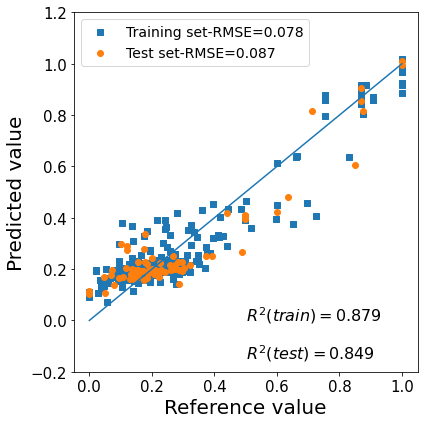

In [48]:
# train the model and get the corresponding score
y_train_predict_13, y_test_predict_13, train_rmse_13, test_rmse_13, train_r2_13, test_r2_13 = \
score(mlp_bag_13, 'Artificial Neural Network Ensemble', 'mlp_bag', X_train_13, X_test_13, y_train_13, y_test_13)

# plot binary diagram
binary_plot(y_train = y_train_13,
            y_train_label = y_train_predict_13,
            y_test = y_test_13,
            y_test_label = y_test_predict_13,
            train_rmse = train_rmse_13,
            test_rmse = test_rmse_13,
            train_r2 = train_r2_13,
            test_r2 = test_r2_13)
save_fig("ann_ensemble_pattern1")

### 1.4 Decision Tree

In [50]:
# get feature data set and label data set, append a new feature column to X_all_14
X_all_14=df1_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
X_all_14['Na/Mg'] = X_all_14['Na'] / X_all_14['Mg']
y_all_14 =df1_edit["Fe3+/Fetot(Correction)"].copy()

In [51]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_14 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)
# divide augmented X and y into training and testing data
for train_index, test_index in split_14.split(df1_edit, df1_edit["clustering_label"]):
    # train : test = 4 : 1
    X_train_14 = X_all_14.loc[train_index]
    X_test_14 = X_all_14.loc[test_index] 
    y_train_14 = y_all_14.loc[train_index]
    y_test_14 = y_all_14.loc[test_index]

----------Decision Tree----------
The RMSE on training set is 0.07
The RMSE on test set is 0.08
R2 score on training set is 0.9
R2 score on test set is 0.873
Successfully store the trained model in dt.pkl
Saving figure dt_pattern1


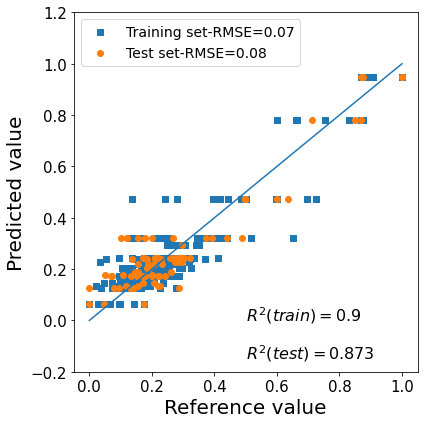

In [84]:
from sklearn.tree import DecisionTreeRegressor

# build up Decision Tree model
dt_14 = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                              max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                              min_impurity_split=None, min_samples_leaf=12, min_samples_split=2,
                              min_weight_fraction_leaf=0.0, presort='deprecated', random_state=42,
                              splitter='best')

# train the model and get the corresponding score
y_train_predict_14, y_test_predict_14, train_rmse_14, test_rmse_14, train_r2_14, test_r2_14 = \
score(dt_14, 'Decision Tree', 'dt', X_train_14, X_test_14, y_train_14, y_test_14)

# plot binary diagram
binary_plot(y_train = y_train_14,
            y_train_label = y_train_predict_14,
            y_test = y_test_14,
            y_test_label = y_test_predict_14,
            train_rmse = train_rmse_14,
            test_rmse = test_rmse_14,
            train_r2 = train_r2_14,
            test_r2 = test_r2_14)
save_fig("dt_pattern1")

### 1.5 Extra Tree

In [54]:
# get feature data set and label data set, append a new feature column to X_all_15
X_all_15=df1_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
X_all_15['Na/Mg'] = X_all_15['Na'] / X_all_15['Mg']
y_all_15 =df1_edit["Fe3+/Fetot(Correction)"].copy()

In [55]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_15 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)
# divide augmented X and y into training and testing data
for train_index, test_index in split_15.split(df1_edit, df1_edit["clustering_label"]):
    # train : test = 4 : 1
    X_train_15 = X_all_15.loc[train_index]
    X_test_15 = X_all_15.loc[test_index] 
    y_train_15 = y_all_15.loc[train_index]
    y_test_15 = y_all_15.loc[test_index]

----------Extra Tree----------
The RMSE on training set is 0.058
The RMSE on test set is 0.078
R2 score on training set is 0.932
R2 score on test set is 0.878
Successfully store the trained model in et.pkl
Saving figure et_pattern1


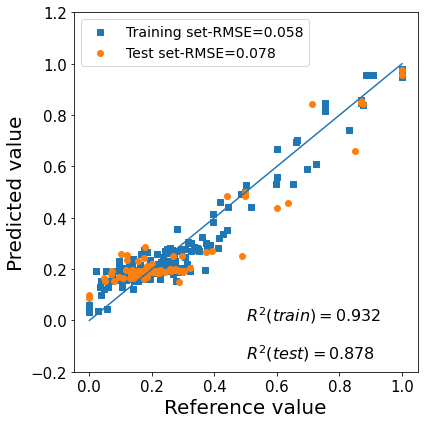

In [56]:
from sklearn.ensemble import ExtraTreesRegressor

# build up Extra Tree model
et_15 = ExtraTreesRegressor(n_estimators=500,bootstrap=False, oob_score=False,
                             max_leaf_nodes=20, random_state=42, n_jobs=-1)

# train the model and get the corresponding score
y_train_predict_15, y_test_predict_15, train_rmse_15, test_rmse_15, train_r2_15, test_r2_15 = \
score(et_15, 'Extra Tree', 'et', X_train_15, X_test_15, y_train_15, y_test_15)

# plot binary diagram
binary_plot(y_train = y_train_15,
            y_train_label = y_train_predict_15,
            y_test = y_test_15,
            y_test_label = y_test_predict_15,
            train_rmse = train_rmse_15,
            test_rmse = test_rmse_15,
            train_r2 = train_r2_15,
            test_r2 = test_r2_15)
save_fig("et_pattern1")

### 1.6 Random Forest

In [58]:
# get feature data set and label data set, append a new feature column to X_all_16
X_all_16=df1_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
X_all_16['Na/Mg'] = X_all_16['Na'] / X_all_16['Mg']
y_all_16 =df1_edit["Fe3+/Fetot(Correction)"].copy()

In [59]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_16 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)
# divide augmented X and y into training and testing data
for train_index, test_index in split_16.split(df1_edit, df1_edit["clustering_label"]):
    # train : test = 4 : 1
    X_train_16 = X_all_16.loc[train_index]
    X_test_16 = X_all_16.loc[test_index] 
    y_train_16 = y_all_16.loc[train_index]
    y_test_16 = y_all_16.loc[test_index]

----------Random Forest----------
The RMSE on training set is 0.055
The RMSE on test set is 0.069
R2 score on training set is 0.938
R2 score on test set is 0.907
Successfully store the trained model in rf.pkl
Saving figure rf_pattern1


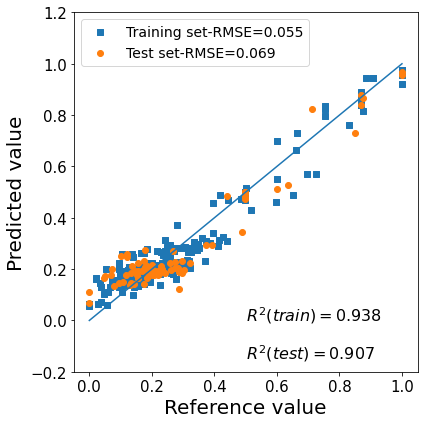

In [60]:
from sklearn.ensemble import RandomForestRegressor

# build up Random Forest model
rf_16 = RandomForestRegressor(n_estimators=500, oob_score=True, max_leaf_nodes=15,
                                n_jobs=-1, random_state=42)

# train the model and get the corresponding score
y_train_predict_16, y_test_predict_16, train_rmse_16, test_rmse_16, train_r2_16, test_r2_16 = \
score(rf_16, 'Random Forest', 'rf', X_train_16, X_test_16, y_train_16, y_test_16)

# plot binary diagram
binary_plot(y_train = y_train_16,
            y_train_label = y_train_predict_16,
            y_test = y_test_16,
            y_test_label = y_test_predict_16,
            train_rmse = train_rmse_16,
            test_rmse = test_rmse_16,
            train_r2 = train_r2_16,
            test_r2 = test_r2_16)
save_fig("rf_pattern1")

# Pattern II

In [63]:
# read the excel of the data for Pattern II
data2 = os.path.join(DATA_PATH, "pattern2_data.xlsx")
df2 = pd.read_excel(data2, engine="openpyxl")
df2_edit = df2
df2_edit

,Si,Ti,Al,Cr,Fe,Mn,Mg,Ca,Na,Fe3+/Fetot(Correction),clustering_label
0,1.988195,1.617300e-03,0.062497,4.192522e-02,0.077608,3.338225e-03,9.844030e-01,7.466732e-01,0.095868,0.090431,3
1,1.983759,2.715916e-03,0.066375,4.937838e-02,0.068836,3.057737e-03,9.767904e-01,7.492345e-01,0.104294,0.133648,3
2,1.993993,2.166593e-03,0.066611,4.923884e-02,0.080684,3.354005e-03,9.622235e-01,7.289888e-01,0.109583,0.108872,3
3,1.980724,1.159726e-02,0.081124,5.215297e-02,0.068058,3.036481e-03,9.459506e-01,7.282775e-01,0.134153,0.107111,3
4,1.998280,8.102694e-04,0.071508,4.144149e-02,0.066954,2.736745e-03,9.580090e-01,7.504767e-01,0.103717,0.101833,3
...,...,...,...,...,...,...,...,...,...,...,...
198,1.970000,1.000000e-07,0.050000,1.000000e-07,0.370000,3.000000e-02,6.200000e-01,8.300000e-01,0.150000,0.257881,4
199,1.970000,1.000000e-07,0.040000,1.000000e-07,0.240000,1.000000e-02,7.700000e-01,8.300000e-01,0.170000,0.410024,4
200,1.970000,1.000000e-07,0.020000,1.000000e-07,0.520000,1.000000e-02,5.000000e-01,6.900000e-01,0.280000,0.477876,2
201,1.960000,1.000000e-07,0.040000,1.000000e-07,0.510000,2.000000e-02,5.400000e-01,7.600000e-01,0.180000,0.260960,3


### 2.1 Linear Regression

In [71]:
# get feature data set and label data set
X_all_21 = df2_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
y_all_21 = df2_edit["Fe3+/Fetot(Correction)"].copy()

In [72]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_21 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
# divide augmented X and y into training and testing data
for train_index, test_index in split_21.split(df2_edit, df2_edit["clustering_label"]):
    # train : test = 4 : 1
    X_train_21 = X_all_21.loc[train_index]
    X_test_21 = X_all_21.loc[test_index] 
    y_train_21 = y_all_21.loc[train_index]
    y_test_21 = y_all_21.loc[test_index]

----------linear regression----------
The RMSE on training set is 0.068
The RMSE on test set is 0.078
R2 score on training set is 0.944
R2 score on test set is 0.918
Successfully store the trained model in Linear_new.pkl
Saving figure lin_reg_pattern2


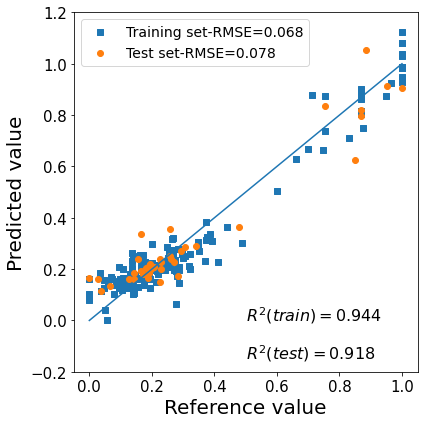

In [73]:
from sklearn.linear_model import LinearRegression

# Based on linear regression, bulid the polynomial regression with the augmented X 
linreg_21 = LinearRegression()
# train the model and get the corresponding score
y_train_predict_21, y_test_predict_21, train_rmse_21, test_rmse_21, train_r2_21, test_r2_21 = \
score(linreg_21, 'linear regression', 'Linear_new',X_train_21, X_test_21, y_train_21, y_test_21)
# plot binary diagram
binary_plot(y_train = y_train_21,
            y_train_label = y_train_predict_21,
            y_test = y_test_21,
            y_test_label = y_test_predict_21,
            train_rmse = train_rmse_21,
            test_rmse = test_rmse_21,
            train_r2 = train_r2_21,
            test_r2 = test_r2_21)
save_fig("lin_reg_pattern2")

### 2.2 Polynomial Regression

In [74]:
from sklearn.decomposition import PCA

# get feature data set and label data set
X_all_22 = df2_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
y_all_22 = df2_edit["Fe3+/Fetot(Correction)"].copy()

# do dimension reduction on the training feature data set 
pca_22 = PCA(n_components=6)
# the original dimensions 9 will be transformed into 6
X_all_reduced_22 = pca_22.fit_transform(X_all_22)
X_all_reduced_22.shape

(203, 6)

In [75]:
pd.DataFrame(X_all_reduced_22)

,0,1,2,3,4,5
0,-0.396931,0.139579,-0.132096,0.071199,-0.018496,0.004589
1,-0.393178,0.147658,-0.119782,0.072163,-0.011120,0.008639
2,-0.367381,0.148101,-0.122382,0.071592,-0.020015,-0.002886
3,-0.351675,0.161438,-0.102693,0.059304,0.000148,0.005400
4,-0.383925,0.141480,-0.113534,0.076655,-0.002095,-0.010125
...,...,...,...,...,...,...
198,-0.079662,-0.187673,0.000462,0.131179,0.025944,0.011153
199,-0.206914,-0.054056,-0.064682,0.117218,0.059903,0.035655
200,0.185614,-0.205726,-0.033481,0.111270,-0.010684,0.035767
201,0.071514,-0.258183,-0.009658,0.112612,-0.032224,0.023146


In [76]:
from sklearn.preprocessing import PolynomialFeatures

# based on the reduction data, do dimension augmentation with the degree of the polynomial features 3
poly_features_22 = PolynomialFeatures(degree=3, include_bias=False)
X_all_augmented_22 = poly_features_22.fit_transform(X_all_reduced_22)
X_all_augmented_22.shape

(203, 83)

In [77]:
# the columns name of the augmented data set
columns_name_22 = poly_features_22.get_feature_names()

# the augmentd data set, x0 refers to the first columns in the reduced data set
X_all_augmented_22 = pd.DataFrame(X_all_augmented_22)
X_all_augmented_22.columns = columns_name_22
X_all_augmented_22

,x0,x1,x2,x3,x4,x5,x0^2,x0 x1,x0 x2,x0 x3,...,x3^3,x3^2 x4,x3^2 x5,x3 x4^2,x3 x4 x5,x3 x5^2,x4^3,x4^2 x5,x4 x5^2,x5^3
0,-0.396931,0.139579,-0.132096,0.071199,-0.018496,0.004589,0.157554,-0.055403,0.052433,-0.028261,...,0.000361,-9.376386e-05,0.000023,2.435836e-05,-6.042965e-06,1.499175e-06,-6.327913e-06,1.569866e-06,-3.894617e-07,9.661996e-08
1,-0.393178,0.147658,-0.119782,0.072163,-0.011120,0.008639,0.154589,-0.058056,0.047096,-0.028373,...,0.000376,-5.790480e-05,0.000045,8.922562e-06,-6.932383e-06,5.386113e-06,-1.374879e-06,1.068212e-06,-8.299473e-07,6.448273e-07
2,-0.367381,0.148101,-0.122382,0.071592,-0.020015,-0.002886,0.134969,-0.054410,0.044961,-0.026302,...,0.000367,-1.025839e-04,-0.000015,2.867886e-05,4.135597e-06,5.963682e-07,-8.017602e-06,-1.156168e-06,-1.667236e-07,-2.404216e-08
3,-0.351675,0.161438,-0.102693,0.059304,0.000148,0.005400,0.123675,-0.056773,0.036115,-0.020856,...,0.000209,5.211502e-07,0.000019,1.302169e-09,4.745582e-08,1.729465e-06,3.253655e-12,1.185752e-10,4.321316e-09,1.574847e-07
4,-0.383925,0.141480,-0.113534,0.076655,-0.002095,-0.010125,0.147399,-0.054318,0.043589,-0.029430,...,0.000450,-1.231258e-05,-0.000059,3.365648e-07,1.626222e-06,7.857621e-06,-9.200012e-09,-4.445285e-08,-2.147884e-07,-1.037820e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-0.079662,-0.187673,0.000462,0.131179,0.025944,0.011153,0.006346,0.014950,-0.000037,-0.010450,...,0.002257,4.464487e-04,0.000192,8.829772e-05,3.795800e-05,1.631763e-05,1.746334e-05,7.507256e-06,3.227268e-06,1.387359e-06
199,-0.206914,-0.054056,-0.064682,0.117218,0.059903,0.035655,0.042813,0.011185,0.013384,-0.024254,...,0.001611,8.230728e-04,0.000490,4.206208e-04,2.503597e-04,1.490178e-04,2.149529e-04,1.279431e-04,7.615365e-05,4.532778e-05
200,0.185614,-0.205726,-0.033481,0.111270,-0.010684,0.035767,0.034453,-0.038186,-0.006215,0.020653,...,0.001378,-1.322772e-04,0.000443,1.270087e-05,-4.252010e-05,1.423492e-04,-1.219501e-06,4.082657e-06,-1.366796e-05,4.575772e-05
201,0.071514,-0.258183,-0.009658,0.112612,-0.032224,0.023146,0.005114,-0.018464,-0.000691,0.008053,...,0.001428,-4.086450e-04,0.000294,1.169348e-04,-8.399181e-05,6.032953e-05,-3.346121e-05,2.403448e-05,-1.726345e-05,1.239997e-05


In [78]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_22 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
# divide augmented X and y into training and testing data
for train_index, test_index in split_22.split(df2_edit, df2_edit["clustering_label"]):
    # train : test = 4 : 1
    X_train_22 = X_all_augmented_22.loc[train_index]
    X_test_22 = X_all_augmented_22.loc[test_index] 
    y_train_22 = y_all_22.loc[train_index]
    y_test_22 = y_all_22.loc[test_index]

----------polynomial regression----------
The RMSE on training set is 0.058
The RMSE on test set is 0.057
R2 score on training set is 0.96
R2 score on test set is 0.956
Successfully store the trained model in poly_new.pkl
Saving figure poly_reg_pattern2


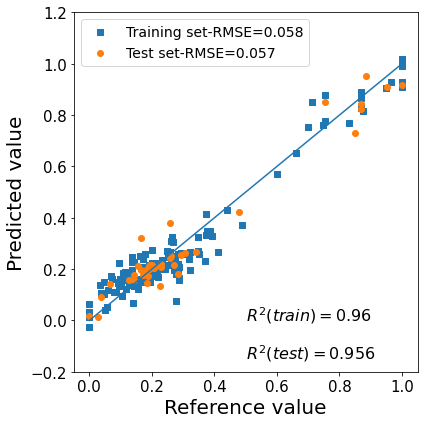

In [79]:
from sklearn.linear_model import LinearRegression

# Based on linear regression, bulid the polynomial regression with the augmented X 
polyreg_22 = ElasticNet(alpha=0.0001, l1_ratio=0.0001, max_iter=100000, tol=0.0005)
# train the model and get the corresponding score
y_train_predict_22, y_test_predict_22, train_rmse_22, test_rmse_22, train_r2_22, test_r2_22 = \
score(polyreg_22, 'polynomial regression', 'poly_new',X_train_22, X_test_22, y_train_22, y_test_22)
# plot binary diagram
binary_plot(y_train = y_train_22,
            y_train_label = y_train_predict_22,
            y_test = y_test_22,
            y_test_label = y_test_predict_22,
            train_rmse = train_rmse_22,
            test_rmse = test_rmse_22,
            train_r2 = train_r2_22,
            test_r2 = test_r2_22)
save_fig("poly_reg_pattern2")

### 2.3 Artificial Neural Network

In [64]:
# get feature data set and label data set
X_all_23 = df2_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
y_all_23 = df2_edit["Fe3+/Fetot(Correction)"].copy()

In [65]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_23 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
# divide augmented X and y into training and testing data
for train_index, test_index in split_23.split(df2_edit, df2_edit["clustering_label"]):
    # train : test = 4 : 1
    X_train_23 = X_all_23.loc[train_index]
    X_test_23 = X_all_23.loc[test_index] 
    y_train_23 = y_all_23.loc[train_index]
    y_test_23 = y_all_23.loc[test_index]

----------Artificial Neural Network----------
The RMSE on training set is 0.072
The RMSE on test set is 0.068
R2 score on training set is 0.938
R2 score on test set is 0.938
Successfully store the trained model in mlp_new.pkl
Saving figure ann_pattern2


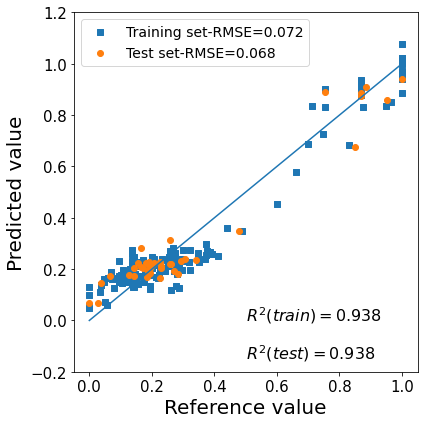

In [66]:
from sklearn.neural_network import MLPRegressor

# build up Artificial Neural Network model
mlp_23 = MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', early_stopping=False,
                   hidden_layer_sizes=(20, 40, 40, 20), max_iter=2000, solver='adam', tol=1e-05,
                   random_state=45)

# train the model and get the corresponding score
y_train_predict_23, y_test_predict_23, train_rmse_23, test_rmse_23, train_r2_23, test_r2_23 = \
score(mlp_23, 'Artificial Neural Network', 'mlp_new', X_train_23, X_test_23, y_train_23, y_test_23)

# plot binary diagram
binary_plot(y_train = y_train_23,
            y_train_label = y_train_predict_23,
            y_test = y_test_23,
            y_test_label = y_test_predict_23,
            train_rmse = train_rmse_23,
            test_rmse = test_rmse_23,
            train_r2 = train_r2_23,
            test_r2 = test_r2_23)
save_fig("ann_pattern2")

### 2.4 Artificial Neural Network Ensemble

In [68]:
# get feature data set and label data set
X_all_24 = df2_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
y_all_24 = df2_edit["Fe3+/Fetot(Correction)"].copy()

In [69]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_24 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
# divide augmented X and y into training and testing data
for train_index, test_index in split_24.split(df2_edit, df2_edit["clustering_label"]):
    # train : test = 4 : 1
    X_train_24 = X_all_24.loc[train_index]
    X_test_24 = X_all_24.loc[test_index] 
    y_train_24 = y_all_24.loc[train_index]
    y_test_24 = y_all_24.loc[test_index]

In [70]:
from sklearn.ensemble import BaggingRegressor

# single ANN model with the same hyperparameter as 2.3 ANN
mlp_24 = MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', early_stopping=False,
                   hidden_layer_sizes=(20, 40, 40, 20), max_iter=2000, solver='adam', tol=1e-05,
                   random_state=45)

# Use Bagging method to ensemble 500 ANN models
mlp_bag_24 = BaggingRegressor(mlp_24, n_estimators=500, bootstrap=True, bootstrap_features=True,
                              n_jobs=-1, oob_score=True, random_state=40)

----------Artificial Neural Network Ensemble----------
The RMSE on training set is 0.074
The RMSE on test set is 0.077
R2 score on training set is 0.933
R2 score on test set is 0.918
Successfully store the trained model in mlp_bag_new.pkl
Saving figure ann_ensemble_pattern2


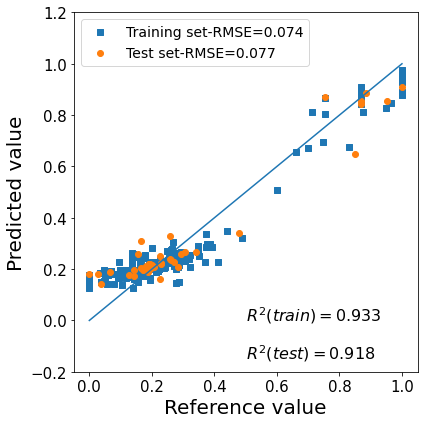

In [71]:
# train the model and get the corresponding score
y_train_predict_24, y_test_predict_24, train_rmse_24, test_rmse_24, train_r2_24, test_r2_24 = \
score(mlp_bag_24, 'Artificial Neural Network Ensemble', 'mlp_bag_new', X_train_24, X_test_24, y_train_24, y_test_24)

# plot binary diagram
binary_plot(y_train = y_train_24,
            y_train_label = y_train_predict_24,
            y_test = y_test_24,
            y_test_label = y_test_predict_24,
            train_rmse = train_rmse_24,
            test_rmse = test_rmse_24,
            train_r2 = train_r2_24,
            test_r2 = test_r2_24)
save_fig("ann_ensemble_pattern2")

### 2.5 Decision Tree

In [72]:
# get feature data set and label data set, append a new feature column to X_all_25
X_all_25=df2_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
X_all_25['Na/Mg'] = X_all_25['Na'] / X_all_25['Mg']
y_all_25 =df2_edit["Fe3+/Fetot(Correction)"].copy()

In [73]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_25 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
# divide augmented X and y into training and testing data
for train_index, test_index in split_25.split(df2_edit, df2_edit["clustering_label"]):
    # train : test = 4 : 1
    X_train_25 = X_all_25.loc[train_index]
    X_test_25 = X_all_25.loc[test_index] 
    y_train_25 = y_all_25.loc[train_index]
    y_test_25 = y_all_25.loc[test_index]

----------Decision Tree----------
The RMSE on training set is 0.046
The RMSE on test set is 0.068
R2 score on training set is 0.975
R2 score on test set is 0.936
Successfully store the trained model in dt_new.pkl
Saving figure dt_pattern2


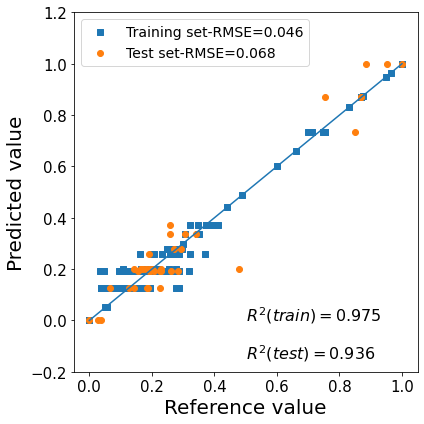

In [83]:
from sklearn.tree import DecisionTreeRegressor

# build up Decision Tree model
dt_25 = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                              max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                              min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                              min_weight_fraction_leaf=0.0, random_state=42, splitter='best',
                              presort='deprecated')

# train the model and get the corresponding score
y_train_predict_25, y_test_predict_25, train_rmse_25, test_rmse_25, train_r2_25, test_r2_25 = \
score(dt_25, 'Decision Tree', 'dt_new', X_train_25, X_test_25, y_train_25, y_test_25)

# plot binary diagram
binary_plot(y_train = y_train_25,
            y_train_label = y_train_predict_25,
            y_test = y_test_25,
            y_test_label = y_test_predict_25,
            train_rmse = train_rmse_25,
            test_rmse = test_rmse_25,
            train_r2 = train_r2_25,
            test_r2 = test_r2_25)
save_fig("dt_pattern2")

### 2.6 Extra Tree 

In [75]:
# get feature data set and label data set, append a new feature column to X_all_26
X_all_26=df2_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
X_all_26['Na/Mg'] = X_all_26['Na'] / X_all_26['Mg']
y_all_26 =df2_edit["Fe3+/Fetot(Correction)"].copy()

In [76]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_26 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
# divide augmented X and y into training and testing data
for train_index, test_index in split_26.split(df2_edit, df2_edit["clustering_label"]):
    # train : test = 4 : 1
    X_train_26 = X_all_26.loc[train_index]
    X_test_26 = X_all_26.loc[test_index] 
    y_train_26 = y_all_26.loc[train_index]
    y_test_26 = y_all_26.loc[test_index]

----------Extra Tree----------
The RMSE on training set is 0.046
The RMSE on test set is 0.051
R2 score on training set is 0.974
R2 score on test set is 0.965
Successfully store the trained model in et_new.pkl
Saving figure et_pattern2


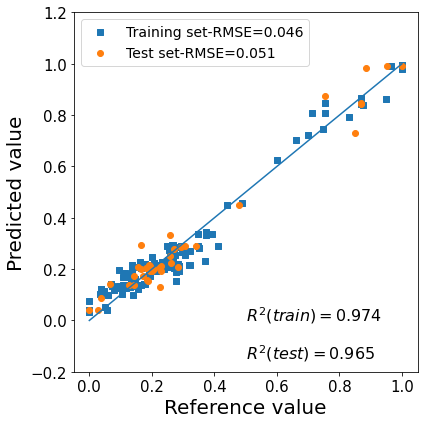

In [77]:
from sklearn.ensemble import ExtraTreesRegressor

# build up Extra Tree model
et_26 = ExtraTreesRegressor(n_estimators=500,bootstrap=False, oob_score=False,
                            max_leaf_nodes=15, random_state=42, n_jobs=-1)

# train the model and get the corresponding score
y_train_predict_26, y_test_predict_26, train_rmse_26, test_rmse_26, train_r2_26, test_r2_26 = \
score(et_26, 'Extra Tree', 'et_new', X_train_26, X_test_26, y_train_26, y_test_26)

# plot binary diagram
binary_plot(y_train = y_train_26,
            y_train_label = y_train_predict_26,
            y_test = y_test_26,
            y_test_label = y_test_predict_26,
            train_rmse = train_rmse_26,
            test_rmse = test_rmse_26,
            train_r2 = train_r2_26,
            test_r2 = test_r2_26)
save_fig("et_pattern2")

### 2.7 Random Forest

In [80]:
# get feature data set and label data set, append a new feature column to X_all_27
X_all_27 = df2_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
X_all_27['Na/Mg'] = X_all_27['Na'] / X_all_27['Mg']
y_all_27 = df2_edit["Fe3+/Fetot(Correction)"].copy()

In [81]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_27 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
# divide augmented X and y into training and testing data
for train_index, test_index in split_27.split(df2_edit, df2_edit["clustering_label"]):
    # train : test = 4 : 1
    X_train_27 = X_all_27.loc[train_index]
    X_test_27 = X_all_27.loc[test_index] 
    y_train_27 = y_all_27.loc[train_index]
    y_test_27 = y_all_27.loc[test_index]

----------Random Forest----------
The RMSE on training set is 0.039
The RMSE on test set is 0.055
R2 score on training set is 0.982
R2 score on test set is 0.959
Successfully store the trained model in rf_new.pkl
Saving figure rf_pattern2


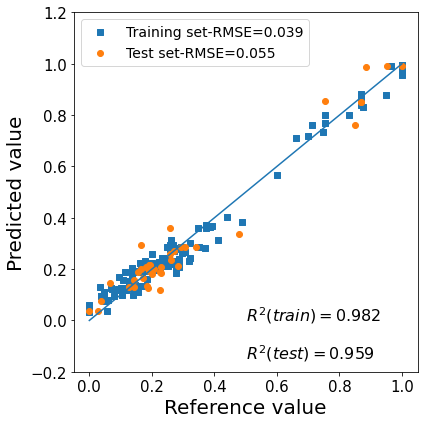

In [82]:
from sklearn.ensemble import RandomForestRegressor

# build up Random Forest model
rnd_27 = RandomForestRegressor(n_estimators=500, oob_score=True, max_leaf_nodes=15,
                               n_jobs=-1, random_state=42)

# train the model and get the corresponding score
y_train_predict_27, y_test_predict_27, train_rmse_27, test_rmse_27, train_r2_27, test_r2_27 = \
score(rnd_27, 'Random Forest', 'rf_new', X_train_27, X_test_27, y_train_27, y_test_27)

# plot binary diagram
binary_plot(y_train = y_train_27,
            y_train_label = y_train_predict_27,
            y_test = y_test_27,
            y_test_label = y_test_predict_27,
            train_rmse = train_rmse_27,
            test_rmse = test_rmse_27,
            train_r2 = train_r2_27,
            test_r2 = test_r2_27)
save_fig("rf_pattern2")

# Pattern III

In [86]:
# read the excel of the data for Pattern III
data3 = os.path.join(DATA_PATH, "pattern3_data.xlsx")
df3 = pd.read_excel(data3, engine="openpyxl")
df3_edit = df3
df3_edit

,Si,Ti,Al,Cr,Fe,Mn,Mg,Ca,Na,Si.1,Ti.1,Al.1,Cr.1,Fe.1,Mn.1,Ni,Mg.1,Fe3+/Fetot(Correction),clustering_label
0,1.880934,0.015039,0.287436,0.021552,0.077207,2.770668e-03,0.801373,0.790934,0.141648,0.001303,0.000392,1.755872,0.190342,0.277167,0.002869,0.008384,0.788871,0.245730,1
1,1.892376,0.015528,0.284656,0.020327,0.078130,2.453617e-03,0.773549,0.810870,0.119354,0.000000,0.002386,1.777803,0.184523,0.252212,0.001791,0.008505,0.789231,0.260358,1
2,1.904724,0.013995,0.268677,0.025377,0.068329,1.544699e-03,0.788436,0.793338,0.137905,0.000794,0.000598,1.694948,0.242602,0.287615,0.002242,0.008519,0.792516,0.236632,1
3,1.897332,0.013840,0.260175,0.021959,0.095928,2.749659e-03,0.822183,0.777593,0.109102,0.000000,0.002964,1.713711,0.229507,0.251993,0.000668,0.008875,0.817708,0.181867,1
4,1.889801,0.015017,0.273757,0.019512,0.098037,2.459220e-03,0.821304,0.769558,0.114701,0.000000,0.001991,1.758153,0.196257,0.243227,0.002466,0.006812,0.811898,0.147499,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1.868733,0.013676,0.248524,0.028744,0.069932,3.079378e-03,0.796719,0.903731,0.091639,0.002594,0.001951,1.711798,0.280930,0.208229,0.004394,0.006259,0.781022,0.101579,1
123,1.877843,0.010951,0.261635,0.040282,0.094348,3.082396e-09,0.846326,0.775942,0.105841,0.010920,0.008215,1.492968,0.442486,0.271697,0.002312,0.015373,0.765134,0.215836,1
124,1.906501,0.005516,0.207411,0.028987,0.073588,3.105364e-09,0.836235,0.876003,0.071086,0.021036,0.001978,1.676596,0.286895,0.233100,0.004454,0.012691,0.756547,0.101579,1
125,1.855786,0.013823,0.294511,0.031959,0.101417,3.112542e-09,0.832690,0.783531,0.106876,0.015901,0.007975,1.646085,0.284967,0.263751,0.004489,0.017055,0.766462,0.243908,1


### 3.1 Linear Regression

In [87]:
# get feature data set and label data set
X_all_31 = df3_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
y_all_31 = df3_edit["Fe3+/Fetot(Correction)"].copy()

In [88]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_31 = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=19)
# divide augmented X and y into training and testing data
for train_index, test_index in split_31.split(df3_edit, df3_edit["clustering_label"]):
    # train : test = 9 : 1
    X_train_31 = X_all_31.loc[train_index]
    X_test_31 = X_all_31.loc[test_index] 
    y_train_31 = y_all_31.loc[train_index]
    y_test_31 = y_all_31.loc[test_index]

----------linear regression----------
The RMSE on training set is 0.049
The RMSE on test set is 0.04
R2 score on training set is 0.385
R2 score on test set is 0.574
Successfully store the trained model in Linear_spl.pkl
Saving figure lin_reg_pattern3


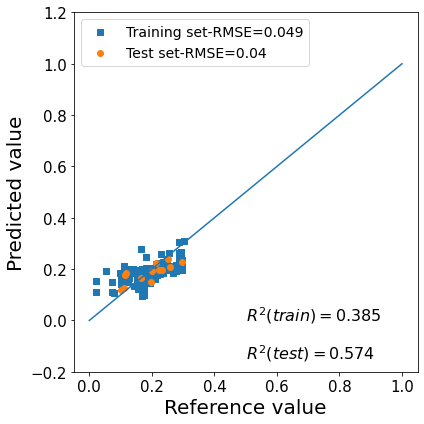

In [89]:
from sklearn.linear_model import LinearRegression

# Based on linear regression, bulid the polynomial regression with the augmented X 
linreg_31 = LinearRegression()
# train the model and get the corresponding score
y_train_predict_31, y_test_predict_31, train_rmse_31, test_rmse_31, train_r2_31, test_r2_31 = \
score(linreg_31, 'linear regression', 'Linear_spl',X_train_31, X_test_31, y_train_31, y_test_31)
# plot binary diagram
binary_plot(y_train = y_train_31,
            y_train_label = y_train_predict_31,
            y_test = y_test_31,
            y_test_label = y_test_predict_31,
            train_rmse = train_rmse_31,
            test_rmse = test_rmse_31,
            train_r2 = train_r2_31,
            test_r2 = test_r2_31)
save_fig("lin_reg_pattern3")

### 3.2 Extra Tree

In [90]:
# get feature data set and label data set, append a new feature column to X_all_32
X_all_32=df3_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
y_all_32 =df3_edit["Fe3+/Fetot(Correction)"].copy()

In [91]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_32 = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=19)
# divide augmented X and y into training and testing data
for train_index, test_index in split_32.split(df3_edit, df3_edit["clustering_label"]):
    # train : test = 9 : 1
    X_train_32 = X_all_32.loc[train_index]
    X_test_32 = X_all_32.loc[test_index] 
    y_train_32 = y_all_32.loc[train_index]
    y_test_32 = y_all_32.loc[test_index]

----------Extra Tree----------
The RMSE on training set is 0.031
The RMSE on test set is 0.034
R2 score on training set is 0.765
R2 score on test set is 0.697
Successfully store the trained model in et_spl.pkl
Saving figure et_pattern3


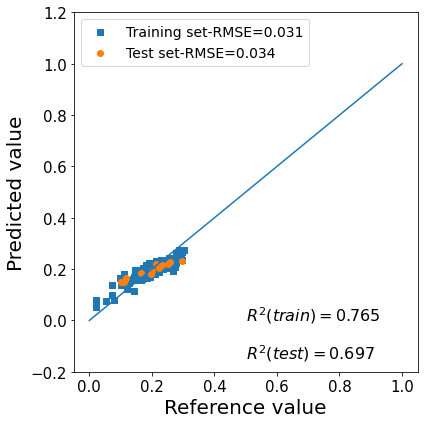

In [92]:
from sklearn.ensemble import ExtraTreesRegressor

# build up Extra Tree model
etr_clf_32 = ExtraTreesRegressor(n_estimators=500,bootstrap=False, oob_score=False,
                                 max_leaf_nodes=15, random_state=42, n_jobs=-1)

# train the model and get the corresponding score
y_train_predict_32, y_test_predict_32, train_rmse_32, test_rmse_32, train_r2_32, test_r2_32 = \
score(etr_clf_32, 'Extra Tree', 'et_spl', X_train_32, X_test_32, y_train_32, y_test_32)

# plot binary diagram
binary_plot(y_train = y_train_32,
            y_train_label = y_train_predict_32,
            y_test = y_test_32,
            y_test_label = y_test_predict_32,
            train_rmse = train_rmse_32,
            test_rmse = test_rmse_32,
            train_r2 = train_r2_32,
            test_r2 = test_r2_32)
save_fig("et_pattern3")

### 3.3 Random Forest

In [93]:
# get feature data set and label data set, append a new feature column to X_all_33
X_all_33 = df3_edit.drop(["Fe3+/Fetot(Correction)", "clustering_label"], axis=1)
y_all_33 = df3_edit["Fe3+/Fetot(Correction)"].copy()

In [94]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratified random sampling based on the results of KMeans Clustering
split_33 = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=19)
# divide augmented X and y into training and testing data
for train_index, test_index in split_33.split(df3_edit, df3_edit["clustering_label"]):
    # train : test = 9 : 1
    X_train_33 = X_all_33.loc[train_index]
    X_test_33 = X_all_33.loc[test_index] 
    y_train_33 = y_all_33.loc[train_index]
    y_test_33 = y_all_33.loc[test_index]

----------Random Forest----------
The RMSE on training set is 0.025
The RMSE on test set is 0.024
R2 score on training set is 0.84
R2 score on test set is 0.846
Successfully store the trained model in rf_spl.pkl
Saving figure rf_pattern3


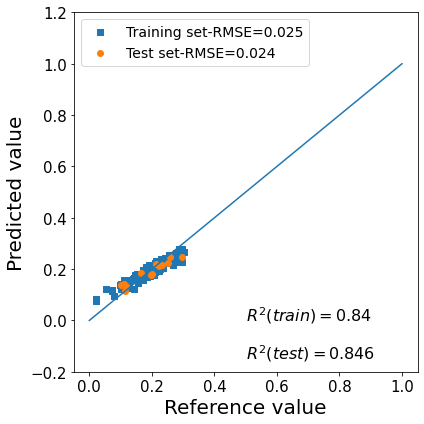

In [95]:
from sklearn.ensemble import RandomForestRegressor

# build up Random Forest model
rnd_clf_33 = RandomForestRegressor(n_estimators=500, oob_score=True, max_leaf_nodes=15,
                                n_jobs=-1, random_state=42)

# train the model and get the corresponding score
y_train_predict_33, y_test_predict_33, train_rmse_33, test_rmse_33, train_r2_33, test_r2_33 = \
score(rnd_clf_33, 'Random Forest', 'rf_spl', X_train_33, X_test_33, y_train_33, y_test_33)

# plot binary diagram
binary_plot(y_train = y_train_33,
            y_train_label = y_train_predict_33,
            y_test = y_test_33,
            y_test_label = y_test_predict_33,
            train_rmse = train_rmse_33,
            test_rmse = test_rmse_33,
            train_r2 = train_r2_33,
            test_r2 = test_r2_33)
save_fig("rf_pattern3")